# Markov Chains

In this script, we try to make a distinction between SBH and LBH. We will look at the frequency of function types and compare them between the books.

In [1]:
import glob, re, getpass, collections, operator, scipy.stats, sklearn.metrics
from itertools import chain
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from discreteMarkovChain import markovChain
from functions.bhsa import get_data, unique, lbh_books, sbh_books # <- here's the new data data load statement -CK

   |     0.38s T kind                 from C:/Users/etien/Documents/github/bhsa/tf/c


In [2]:
all_data = get_data()

data = all_data['phrase_functions']

unique_functions = unique(otype='phrase', feature='function') # N.B., I've added back our excluded functions

 # Counting frequencies phrase functions

## Phrase function count

We can count the frequency of phrase functions. We consider three different approaches to count the functions. We can: 
1) Consider all phrase functions.
2) Consider only the first phrase function of a clause.
3) Consider only the last phrase function of a clause. 
Here, we do not yet look at the sequence of words, but only the frequency of phrase functions. 

In [7]:
test = [['pred', 'subj'], ['subj','adj', 'red']]

list(chain(*test))

['pred', 'subj', 'subj', 'adj', 'red']

In [8]:
phrase_function_count = dict() # Looking at all functions
begin_phrase_function_count = dict() # Consider only the first function of a clause
end_phrase_function_count = dict() # Consider only the last function of clause 

for bookname, clauses in data.items():
    phrase_function_count[bookname] = collections.Counter(list(chain(*clauses))) 
    begin_phrase_function_count[bookname] = collections.Counter([x[0] for x in clauses]) # First function
    end_phrase_function_count[bookname] = collections.Counter([x[-1] for x in clauses]) # Last function

# Make a dataframe
df_Count = pd.DataFrame(phrase_function_count, columns=data.keys()).fillna(0)
df_Begin_Count = pd.DataFrame(begin_phrase_function_count, columns=data.keys()).fillna(0)
df_End_Count = pd.DataFrame(begin_phrase_function_count, columns=data.keys()).fillna(0)

# Normalize the dataframes. This means that we divide all frequencies by the sum of the frequencies. 
df_prob_Count = df_Count.div(df_Count.sum(axis=0), axis=1)
df_prob_Begin_Count = df_Begin_Count.div(df_Begin_Count.sum(axis=0), axis=1)
df_prob_End_Count = df_End_Count.div(df_End_Count.sum(axis=0), axis=1)

In [9]:
#Sample
df_prob_Count[list(lbh_books)] # or sbh_books

,1_Chronicles,Ezra,Nehemiah,2_Chronicles,Esther
Adju,0.062888,0.073557,0.035354,0.053516,0.042194
Cmpl,0.107660,0.101490,0.121212,0.123968,0.148383
Conj,0.216615,0.175978,0.220960,0.223171,0.202532
Exst,0.000000,0.000931,0.001263,0.000000,0.000000
Frnt,0.002588,0.001862,0.000842,0.003131,0.000703
IntS,0.000518,0.000000,0.000000,0.001423,0.000000
Intj,0.000000,0.000000,0.000421,0.000854,0.000000
Loca,0.010611,0.015829,0.022306,0.013094,0.007736
ModS,0.000000,0.000000,0.000000,0.000000,0.000703
Modi,0.006211,0.006518,0.007997,0.005693,0.005626


In [10]:
df_prob_Count[list(sbh_books)]

,Judges,2_Samuel,Exodus,1_Kings,2_Kings,Genesis,1_Samuel,Leviticus,Deuteronomy,Joshua
Adju,0.017553,0.018948,0.032289,0.027240,0.025244,0.016612,0.011163,0.019833,0.037295,0.026178
Cmpl,0.142730,0.137233,0.108207,0.121212,0.133225,0.120223,0.132051,0.161795,0.140329,0.151377
Conj,0.252837,0.255335,0.232750,0.229207,0.244137,0.251680,0.261163,0.228601,0.213654,0.224903
Exst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000384,0.000000,0.000000,0.000000,0.000000
Frnt,0.000887,0.001656,0.002306,0.004513,0.002117,0.001344,0.001322,0.000000,0.000000,0.002276
IntS,0.000000,0.000000,0.000000,0.000161,0.000163,0.000096,0.000000,0.000000,0.000000,0.000228
Intj,0.003191,0.002208,0.002306,0.002418,0.002606,0.004033,0.002938,0.001044,0.001264,0.000683
Loca,0.010106,0.010302,0.023448,0.012734,0.013029,0.011523,0.008960,0.008351,0.015803,0.012520
ModS,0.000355,0.000184,0.000000,0.000484,0.000000,0.000384,0.000147,0.000000,0.000000,0.000000
Modi,0.006560,0.009382,0.009994,0.007253,0.005700,0.008258,0.007197,0.008351,0.005689,0.008195


A second strategy to analyse clauses is looking at the length of these clauses.

## Length clauses count

In [11]:
length_count = dict()
for bookname, clauses in data.items():
    length_count[bookname]=collections.Counter([len(x) for x in clauses])
#Dataframe
df_length_count = pd.DataFrame(length_count, columns=data.keys()).fillna(0)
#Normalized
df_prob_length_count = df_length_count.div(df_length_count.sum(axis=0), axis=1)

df_prob_length_count

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
1,0.046729,0.052748,0.062347,0.125000,0.099609,0.058013,0.038636,0.044527,0.047031,0.057730,0.049599,0.053452,0.063563,0.118734,0.079900,0.065509,0.049166
2,0.238770,0.223671,0.206601,0.131757,0.199219,0.232052,0.204545,0.215213,0.202822,0.263699,0.229459,0.216036,0.244279,0.292876,0.282147,0.262826,0.217411
3,0.341875,0.354766,0.335575,0.236486,0.343750,0.316896,0.382386,0.365955,0.360964,0.354207,0.397295,0.376392,0.351457,0.313984,0.328340,0.329913,0.373478
4,0.287911,0.282491,0.297066,0.415541,0.257812,0.282814,0.278977,0.295455,0.301587,0.250000,0.254008,0.238307,0.250538,0.197889,0.233458,0.258879,0.263419
5,0.072053,0.072394,0.084352,0.070946,0.074219,0.085569,0.080114,0.070501,0.074662,0.060176,0.059619,0.100223,0.070213,0.063325,0.057428,0.066298,0.072170
6,0.010853,0.011847,0.010391,0.020270,0.021484,0.018854,0.014205,0.007885,0.009994,0.012720,0.009018,0.011136,0.016624,0.013193,0.014981,0.014207,0.020298
7,0.001809,0.001965,0.003667,0.000000,0.001953,0.005801,0.001136,0.000464,0.002939,0.001468,0.000501,0.004454,0.003325,0.000000,0.003745,0.002368,0.004060
8,0.000000,0.000119,0.000000,0.000000,0.001953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Graphing

Here, we can create graphs for analyzing the data.

## Comparing frequencies

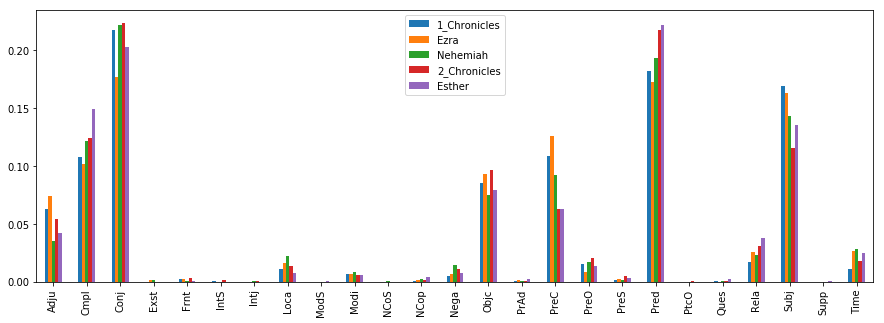

In [12]:
books = list(lbh_books) #["1_Samuel","2_Samuel"] #Choose two or more books to compare
df_graph = df_prob_Count[books] #or df_prob_Begin_Count, df_prob_length_count, df_prob_End_Count
plt.figure()
df_graph.plot(figsize = (15,5), kind='bar')
plt.show()

## Top frequent functions 

Here, a graph is made where the top most frequent functions is shown for each book. The x-axis shows the top x most frequent functions and the y-axis shows the probability that belongs to the top frequent functions. 

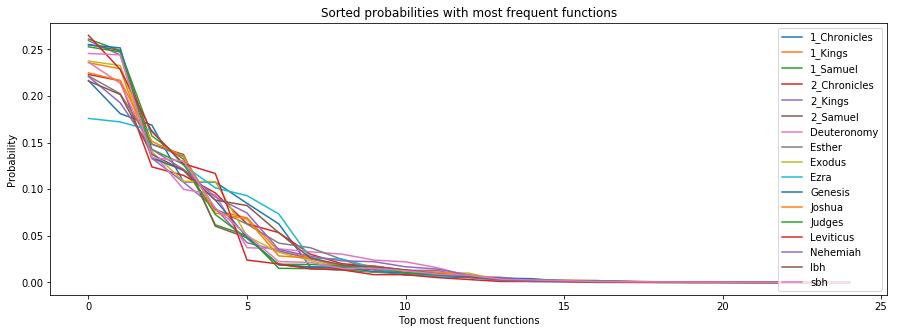

In [13]:
dictionary_prob = dict()
for column in df_prob_Count:
    probs = df_prob_Count[column].values
    dictionary_prob[column] = sorted(probs, reverse=True)
df_sorted_prob = pd.DataFrame(dictionary_prob)

plt.figure()
df_sorted_prob.plot(figsize = (15,5), kind='line')
plt.title("Sorted probabilities with most frequent functions")
plt.xlabel("Top most frequent functions")
plt.ylabel("Probability")
plt.show()

# Testing Frequencies

To compare books based on the function frequency, a chi-square test can be performed to look whether the frequencies are equivalent between books. We want to determine which books are the same and which are different. Normally, a p-value of 0.05 is used to determine whether the books are significantly different. The null hypothesis in each test is that the books are equivalent based on the chosen criteria to compare the books. If the p-value is below 0.05, we reject the null hypothesis and therefore reject the hypothesis that the books show similarity based on the criteria. 

In [14]:
def chi_squareTest(matrix):
    '''
    Perform a chi-squared test on any matrix and return the p value.
    '''
    chi2, p, dof, ex = scipy.stats.chi2_contingency(matrix)
    return p

def computetesting(df):
    '''
    Performs the chi-squared test on each pair of columns 
    to test whether two books are similar or different. 
    '''
    books = df.keys()
    df_test = pd.DataFrame(np.zeros((len(books), len(books))), columns = books, index = books)
    
    # test each pair of columns
    for indexi,i in enumerate(books):
        for indexj,j in enumerate(books):
            if indexi>indexj:
                dfTemp = df[[i,j]]                     # Select columns
                dfTemp = dfTemp[(dfTemp.T != 0).any()] # Remove zeros
                dfTemp = np.matrix(dfTemp)             # Make np matrix
                dfTemp = dfTemp.transpose()            # Transpose matrix
                dfTemp = dfTemp.astype(int)            # Convert to integers
                df_test.loc[i,j] = round(chi_squareTest(dfTemp), 5)
    return df_test.replace(0.0,np.nan)

For the dataframes: df_Count, df_Begin_Count, df_End_Count, df_length_count, the p values of the chi square testing can be obtained

In [15]:
computetesting(df_Count[list(sbh_books)])

,Judges,2_Samuel,Exodus,1_Kings,2_Kings,Genesis,1_Samuel,Leviticus,Deuteronomy,Joshua
Judges,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_Samuel,0.00039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exodus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genesis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_Samuel,0.00001,0.11509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leviticus,0.00001,NaN,NaN,NaN,NaN,0.00027,NaN,NaN,NaN,NaN
Deuteronomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joshua,NaN,NaN,NaN,0.00011,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
computetesting(df_Begin_Count[list(lbh_books)])

,1_Chronicles,Ezra,Nehemiah,2_Chronicles,Esther
1_Chronicles,NaN,NaN,NaN,NaN,NaN
Ezra,NaN,NaN,NaN,NaN,NaN
Nehemiah,NaN,NaN,NaN,NaN,NaN
2_Chronicles,NaN,NaN,NaN,NaN,NaN
Esther,NaN,NaN,NaN,0.00283,NaN


# Sequence phrase functions

The frequency analysis is now completed. Now, the order of the words can be looked into. First, we create a transition frequency table where we count the number of times we go from one phrase function to the next one. The Clause Begin can be seen as the state of the sequence before starting a new clause and Clause End indicates the state of the sequence after the last phrase function. We go obviously from the Clause End to Clause begin to show that we go to new clause. 

In [17]:
df_Transition_freq = dict() # Transition matrix with frequences
df_Transition_prob = dict() # Normalized transition matrix

nodes = ["Clause_Begin", "Clause_End"] +  unique_functions

for bookname, clauses in data.items():
    transition_Matrix = np.zeros((len(nodes),len(nodes)))
    # count transitions using bigrams
    transitions = list()
    for clause in clauses:
        transitions.append("Clause_Begin")
        transitions.extend(clause)
        transitions.append("Clause_End")
    for i in range(0, len(transitions)-1):
        transition_Matrix[nodes.index(transitions[i]), nodes.index(transitions[i+1])] +=1 
    df_Trans = pd.DataFrame(transition_Matrix, columns = nodes, index = nodes)    
    
    #Remove unused transition functions
    df_Trans = df_Trans[(df_Trans.T != 0).any()]
    df_Trans = df_Trans.loc[:, (df_Trans != 0).any(axis=0)]
    
    df_Transition_freq[bookname] = df_Trans    
    #Normalized by row 
    df_Transition_prob[bookname] = df_Trans.div(df_Trans.sum(axis=1), axis=0)

#Sample
print(df_Transition_freq.keys())
df_Transition_freq["1_Samuel"] #df_Transition_prob

dict_keys(['Genesis', 'sbh', 'Exodus', 'Leviticus', 'Deuteronomy', 'Joshua', 'Judges', '1_Samuel', '2_Samuel', '1_Kings', '2_Kings', 'Esther', 'lbh', 'Ezra', 'Nehemiah', '1_Chronicles', '2_Chronicles'])


,Clause_Begin,Clause_End,Pred,Conj,Subj,Cmpl,Objc,PreC,Adju,Rela,...,Modi,Loca,Intj,Frnt,PreS,NCop,PrAd,Supp,PtcO,ModS
Clause_Begin,0.0,0.0,155.0,1777.0,39.0,1.0,4.0,41.0,5.0,87.0,...,2.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,0.0,1.0
Clause_End,2155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pred,0.0,338.0,0.0,0.0,696.0,369.0,189.0,18.0,12.0,0.0,...,21.0,15.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
Conj,0.0,0.0,1341.0,1.0,205.0,9.0,20.0,30.0,2.0,14.0,...,0.0,5.0,20.0,8.0,1.0,7.0,0.0,0.0,0.0,0.0
Subj,0.0,347.0,85.0,0.0,0.0,282.0,130.0,168.0,13.0,0.0,...,10.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Cmpl,0.0,714.0,5.0,0.0,49.0,38.0,30.0,6.0,15.0,0.0,...,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Objc,0.0,270.0,21.0,0.0,2.0,81.0,6.0,0.0,14.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
PreC,0.0,198.0,2.0,0.0,33.0,69.0,18.0,0.0,7.0,0.0,...,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Adju,0.0,58.0,2.0,0.0,1.0,5.0,3.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Rela,0.0,0.0,30.0,0.0,2.0,0.0,0.0,67.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Subtracting Transition Matrices

In [18]:
df_sub = df_Transition_prob["lbh"].subtract(df_Transition_prob["sbh"], fill_value =0)
round(df_sub,3)

,Clause_Begin,Clause_End,Pred,Conj,Subj,Cmpl,Objc,PreC,Adju,Rela,...,Frnt,PreS,NCop,IntS,PrAd,Supp,PtcO,Exst,NCoS,ModS
Clause_Begin,0.0,0.000,0.015,-0.101,0.046,0.005,-0.000,0.017,0.004,0.01,...,-0.000,-0.002,0.001,0.002,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
Clause_End,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Pred,0.0,-0.056,0.000,0.000,-0.038,0.015,0.040,0.011,0.031,0.00,...,0.000,0.000,0.000,0.000,0.000,-0.002,0.000,0.000,0.000,0.000
Conj,0.0,0.000,-0.171,-0.000,0.053,0.011,0.031,0.026,0.021,0.00,...,0.003,0.000,0.001,0.000,0.000,0.000,0.000,0.001,-0.000,-0.000
Subj,0.0,0.002,0.012,0.000,0.000,-0.102,-0.034,0.101,0.025,0.00,...,0.000,0.000,-0.001,0.000,-0.001,0.000,0.000,0.000,0.000,0.000
Cmpl,0.0,-0.037,0.004,0.000,-0.007,0.003,0.007,0.002,0.035,0.00,...,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000
Objc,0.0,-0.010,0.017,0.000,-0.011,-0.033,-0.017,0.002,0.050,0.00,...,0.000,0.000,0.000,0.000,-0.001,-0.001,0.000,0.000,0.000,0.000
PreC,0.0,-0.004,-0.005,0.000,-0.015,-0.004,0.022,0.000,0.031,0.00,...,0.000,0.000,-0.001,0.000,-0.001,-0.000,0.000,0.000,0.000,0.000
Adju,0.0,-0.096,-0.007,0.000,0.039,0.013,0.040,0.003,0.028,0.00,...,0.000,0.000,0.000,0.000,-0.001,-0.001,0.000,0.000,-0.001,0.000
Rela,0.0,0.000,-0.049,0.000,-0.005,-0.001,0.000,0.055,-0.003,0.00,...,0.000,0.000,-0.001,0.000,0.000,0.000,0.000,-0.002,-0.001,0.000


In [19]:
df_sub_abs = abs(df_sub)
dictionary = dict()
for index, row_dict in enumerate(df_sub_abs.to_dict(orient="records")):
    for key, value in row_dict.items():
        dictionary[nodes[index],key]=value
sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:10]

[(('PtcO', 'Clause_End'), 0.75),
 (('PrAd', 'Cmpl'), 0.5625),
 (('PtcO', 'PreC'), 0.5),
 (('Intj', 'Subj'), 0.46808510638297873),
 (('Supp', 'Clause_End'), 0.33333333333333337),
 (('Supp', 'Cmpl'), 0.33333333333333331),
 (('Intj', 'Clause_End'), 0.28064842958459979),
 (('PrAd', 'Objc'), 0.25),
 (('PtcO', 'Subj'), 0.25),
 (('Time', 'Clause_End'), 0.22498164603427762)]

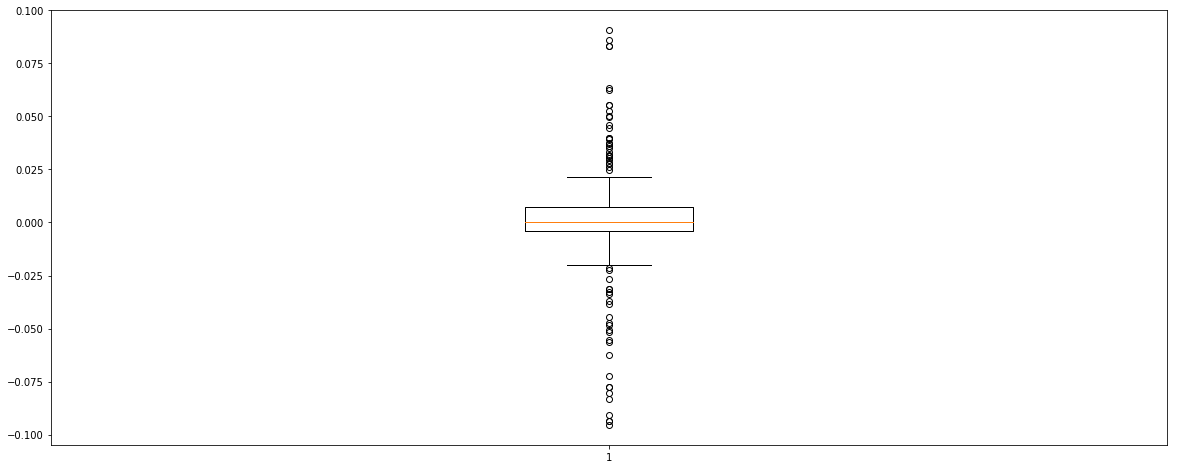

0.96346456294378813

In [20]:
datadf = np.squeeze(np.asarray(df_sub.values)).ravel()
datadf = datadf[datadf!=0]
def reject_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
datadf = reject_outliers(datadf)
plt.figure(figsize=(20,8))
plt.boxplot(datadf)
#plt.hist(datadf,bins=50)
plt.show()
#t.test(np.asmatrix(dfSubtracting))
scipy.stats.ttest_1samp(datadf, 0).pvalue
#scipy.stats.shapiro(datadf)

#scipy.stats.probplot(np.log(abs(datadf)), dist="norm", plot=plt)
#plt.show()
#scipy.stats.kstest(np.log(abs(datadf)), "lognorm", scipy.stats.lognorm.fit(datadf)



# Markov Chain

In [21]:
df_MC_SSP = pd.DataFrame()
for bookname,df in df_Transition_prob.items():
    P = np.matrix(df.as_matrix())
    mc = markovChain(P)
    mc.computePi('linear') #We can also use 'power', 'krylov' or 'eigen', 'linear'
    dfSS = pd.DataFrame(list(mc.pi), index=df.index, columns=[bookname])
    df_MC_SSP= pd.concat([dfSS,df_MC_SSP], axis=1)
df_MC_SSP= df_MC_SSP.sort_index(axis=1)
df_MC_SSP = df_MC_SSP.replace(np.nan,0.0)
df_MC_SSP

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah,lbh,sbh
Adju,0.037981,0.016421,0.006835,0.032810,0.015298,0.011654,0.022640,0.025862,0.019823,0.043122,0.010148,0.016082,0.010808,0.012258,0.021116,0.032400,0.013152
Clause_Begin,0.198031,0.198601,0.193885,0.193455,0.197000,0.192464,0.196470,0.193534,0.193038,0.206878,0.194568,0.192840,0.192140,0.190968,0.201357,0.196745,0.194473
Clause_End,0.198031,0.198601,0.193885,0.193455,0.197000,0.192464,0.196470,0.193534,0.193038,0.206878,0.194568,0.192840,0.192140,0.190968,0.201357,0.196745,0.194473
Cmpl,0.065020,0.073066,0.080845,0.076003,0.080734,0.084408,0.085188,0.090948,0.066431,0.059498,0.073440,0.092994,0.087882,0.100000,0.072398,0.072918,0.079621
Conj,0.130822,0.138166,0.159892,0.136824,0.147947,0.157049,0.129701,0.124138,0.142891,0.103166,0.153742,0.138162,0.155677,0.141290,0.131976,0.131099,0.149238
Exst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000235,0.000000,0.000000,0.000000,0.000754,0.000154,0.000046
Frnt,0.001563,0.002721,0.000809,0.001920,0.001283,0.001018,0.000000,0.000431,0.001416,0.001092,0.000821,0.001398,0.000546,0.000000,0.000503,0.001424,0.001158
IntS,0.000313,0.000097,0.000000,0.000873,0.000099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000059,0.000140,0.000000,0.000000,0.000000,0.000462,0.000046
Intj,0.000000,0.001457,0.001799,0.000524,0.001579,0.001358,0.000767,0.000000,0.001416,0.000000,0.002464,0.000420,0.001965,0.000645,0.000251,0.000269,0.001632
Loca,0.006408,0.007676,0.005486,0.008028,0.007896,0.006336,0.009593,0.004741,0.014395,0.009279,0.007039,0.007691,0.006223,0.005161,0.013323,0.008235,0.007676


In [22]:
sklearn.metrics.normalized_mutual_info_score(array2,array1)

NameError: name 'array2' is not defined

## Verify MC SSP

We want to verify whether the MC SSP is the same as the normalized frequencies 

In [23]:
length = dict()
for bookname, clauses in data.items():
    length[bookname] = len(clauses) 
df_length = pd.DataFrame(length, index=["Clause_Begin","Clause_End"])
df_new = df_length.append(df_Count)
df_new = df_new.div(df_new.sum(axis=0), axis=1)
df_new= df_new.sort_index(axis=1)
df_new

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah,lbh,sbh
Clause_Begin,0.198031,0.198601,0.193885,0.193455,0.197000,0.192464,0.196470,0.193534,0.193038,0.206878,0.194568,0.192840,0.192140,0.190968,0.201357,0.196745,0.194473
Clause_End,0.198031,0.198601,0.193885,0.193455,0.197000,0.192464,0.196470,0.193534,0.193038,0.206878,0.194568,0.192840,0.192140,0.190968,0.201357,0.196745,0.194473
Adju,0.037981,0.016421,0.006835,0.032810,0.015298,0.011654,0.022640,0.025862,0.019823,0.043122,0.010148,0.016082,0.010808,0.012258,0.021116,0.032400,0.013152
Cmpl,0.065020,0.073066,0.080845,0.076003,0.080734,0.084408,0.085188,0.090948,0.066431,0.059498,0.073440,0.092994,0.087882,0.100000,0.072398,0.072918,0.079621
Conj,0.130822,0.138166,0.159892,0.136824,0.147947,0.157049,0.129701,0.124138,0.142891,0.103166,0.153742,0.138162,0.155677,0.141290,0.131976,0.131099,0.149238
Exst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000235,0.000000,0.000000,0.000000,0.000754,0.000154,0.000046
Frnt,0.001563,0.002721,0.000809,0.001920,0.001283,0.001018,0.000000,0.000431,0.001416,0.001092,0.000821,0.001398,0.000546,0.000000,0.000503,0.001424,0.001158
IntS,0.000313,0.000097,0.000000,0.000873,0.000099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000059,0.000140,0.000000,0.000000,0.000000,0.000462,0.000046
Intj,0.000000,0.001457,0.001799,0.000524,0.001579,0.001358,0.000767,0.000000,0.001416,0.000000,0.002464,0.000420,0.001965,0.000645,0.000251,0.000269,0.001632
Loca,0.006408,0.007676,0.005486,0.008028,0.007896,0.006336,0.009593,0.004741,0.014395,0.009279,0.007039,0.007691,0.006223,0.005161,0.013323,0.008235,0.007676


# References

https://journal.r-project.org/archive/2011/RJ-2011-016/RJ-2011-016.pdf